# State-Action-Value Function (Q-Function)

How does an agent decide what to do? How does an agent know how good her actions have been and evaluate her current situation in the environment? How does she decide what action to take?

The Action-Value Function returns the expected return given a state and an action choice. Therefore, the action-value function represents an extra dimension compared to the State-Value function.

In order to determine an expected return, the learning system must iterate over all actions as well as states. Hence:

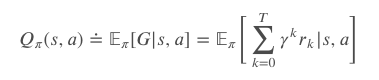

In [22]:
from IPython.display import Image
Image("./figs/action_value_fn.png")

Hence, the difference between the State-Value Function and the Q-Function (State-Action-Value Function) is that the State-Value function specifies the goodness of state, while a Q-Function specifies the goodness of an action in a state. Thus, the Q-Function returns the expected value of taking a given action in a given state.

It therefore extends the insight of the agent, enabling the agent to make a decision on which action is optimal, not just the opimtal state.

Like State-Value functions, Q-Functions can be viewed in a table, called a Q-Table.

In [23]:
# Grid World

starting_position = 1
cliff_position = 0
end_position = 5
reward_goal_state = 5
reward_cliff = 0

def reward(current_position) -> int:
    if current_position <= cliff_position:
        return reward_cliff

    if current_position >= end_position >= end_position:
        return reward_goal_state

    return 0

def is_termination(current_position) -> bool:
    # Fallen off the Cliff
    if current_position <= cliff_position:
        return True

    # Achieved Goal
    if current_position >= end_position:
        return True

    return False

In [8]:
# Agent (Strategy, Policy)
import numpy as np

# Chance Strategy
def strategy() -> int:
    if np.random.random() >= 0.5:
        # Move Right [0-5]
        return 1
    else:
        # Move Left [0-5]
        return -1

In [43]:
# Run Experiment

np.random.seed(42)

# Global Buffers
# Cumulative Value (Sum)
# Action-Value Table (State, Choices)
value_sum = np.zeros((end_position + 1, 2))
n_hits = np.zeros((end_position + 1, 2))

# Return Reward Value, for a given action, in a given state (note, not the Expected Return, over n-trials)
# This represents the contemporaneous reward
def action_value_mapping(x): return 0 if x == -1 else 1

n_iter = 100
for i in range(n_iter):
    # Postion Log
    position_history = []
    current_position = starting_position
    current_action = strategy()

    # Episode (Loop until Termination State == True)
    while True:
        # Append Position to Log
        position_history.append((current_position, current_action))

        if is_termination(current_position):
            break

        # Increment Strategy by and Action; Update position
        # ? Why this and not the current action ?
        current_position += strategy()

    # Take the action; Log Reward
    current_reward = reward(current_position)

    # Add Reward to Global Buffers; Log - To compute the average at the next Step
    for pos, act in position_history:
        value_sum[pos, action_value_mapping(act)] += current_reward
        # ? Counter: number of visits to a given state and action ?
        n_hits[pos, action_value_mapping(act)] += 1

    # Compute Expected Value for Given Action and Value
    expected_return_0 = ','.join(f"{q:.2f}" for q in value_sum[:, 0] / n_hits[:, 0])
    expected_return_1 = ','.join(f"{q:.2f}" for q in value_sum[:, 1] / n_hits[:, 1])
    print("[{}] Average Reward: [{} ; {}]".format(i, expected_return_0, expected_return_1))


[0] Average Reward: [nan,5.00,5.00,5.00,5.00,5.00 ; nan,nan,nan,nan,nan,nan]
[1] Average Reward: [0.00,3.33,5.00,5.00,5.00,5.00 ; nan,nan,nan,nan,nan,nan]
[2] Average Reward: [0.00,2.50,5.00,5.00,5.00,5.00 ; nan,nan,nan,nan,nan,nan]
[3] Average Reward: [0.00,2.50,5.00,5.00,5.00,5.00 ; 0.00,0.00,nan,nan,nan,nan]
[4] Average Reward: [0.00,1.67,3.75,5.00,5.00,5.00 ; 0.00,0.00,nan,nan,nan,nan]
[5] Average Reward: [0.00,1.43,3.75,5.00,5.00,5.00 ; 0.00,0.00,nan,nan,nan,nan]
[6] Average Reward: [0.00,1.43,3.75,5.00,5.00,5.00 ; 0.00,0.00,nan,nan,nan,nan]
[7] Average Reward: [0.00,1.43,3.75,5.00,5.00,5.00 ; 0.00,0.00,0.00,nan,nan,nan]
[8] Average Reward: [0.00,1.43,3.75,5.00,5.00,5.00 ; 0.00,0.00,0.00,0.00,nan,nan]
[9] Average Reward: [0.00,1.25,3.75,5.00,5.00,5.00 ; 0.00,0.00,0.00,0.00,nan,nan]
[10] Average Reward: [0.00,1.25,3.75,5.00,5.00,5.00 ; 0.00,0.00,0.00,0.00,nan,nan]
[11] Average Reward: [0.00,1.25,3.75,5.00,5.00,5.00 ; 0.00,0.00,0.00,0.00,nan,nan]
[12] Average Reward: [0.00,1.25,3.75

/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_7760/1560399680.py:44: RuntimeWarning: invalid value encountered in true_divide
  expected_return_0 = ','.join(f"{q:.2f}" for q in value_sum[:, 0] / n_hits[:, 0])
/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_7760/1560399680.py:45: RuntimeWarning: invalid value encountered in true_divide
  expected_return_1 = ','.join(f"{q:.2f}" for q in value_sum[:, 1] / n_hits[:, 1])


In [45]:
# Assert

n_hits
value_sum

array([[  0.,   0.],
       [110.,  85.],
       [165., 130.],
       [165., 105.],
       [110.,  60.],
       [ 70.,  50.]])